# Notebook Purpose
If our features are truly _predictive_ of the CA retail electricity price three years in advance - rather than simply _correlated_ with the CA retail electricity price _at the same point in time_ - then using linear regression with the time-series-predicted features should give us more accurate predictions than a simple time series prediction of the CA retail electricity price (using the CA retail electricity price as the input).

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
pd.options.display.max_columns = 999

## Prepare Test and Train Data

In [21]:
data = pd.read_csv('https://raw.githubusercontent.com/negarfazeli/energy-prediction/master/FINAL%20DATA%20-%20Sheet1.csv')

In [22]:
data.iloc[1:5,:]

,AllFuelsGen,CoalGen,PetroleumGen,NatGasGen,OtherGasGen,NuclearGen,HydroGen,RenewablesGen,HydroStorageGen,OtherGen,GeothermalGen,IndepGen,GDP,AvgTemp,AvgMaxTemp,AvgRelHum,Price,HydroCons,GeoCons,SolarCons,WindCons,WoodCons,WasteCons,BiofuelsCons,BiomassCons,RenCons,NatGasPrice,ResNatGasPrice,CommNatGasPrice,IndNatGasPrice,ElecPowerNatGasPrice,ElecPowerElecNetGen,CommElecNetGen,IndElecNetGen,TotElecNetGen,ElecImports,ElecExports,ElecNetImports,TDLosses,RetailElecSales,DirectElecUse,EndElecUse,ResPrice,CommPrice,IndPrice,AvgRetailPrice,ResNatGasCons,CommNatGasCons,IndLPNatGasCons,OtherIndNatGasCons,OtherNonCHPIndNatGasCons,TotIndOtherNatGasCons,TotIndNatGasCons,PDTransNatGasCons,FuelTransNatGasCons,TotTransNatGasCons,ElecPowerNatGasCons,TotNatGasCons,ElecCoalCons,ElecNatGasCons,TotRetailElecSales,TotCoalCons,CA_GDP,CoalCap,LargeHydroCap,NatGasCap,NuclearCap,OilCap,BiomassCap,GeothermalCap,SmallHydroCap,SolarPVCap,SolarThermalCap,WindCap,TotalElecCap
1,14380.39,184.14,175.65,8870.58,101.84,2229.87,1290.01,1504.66,-172.96,17.30,951.16,951.21,1637.15,50.04,57.29,71.37,9.63,180.55,12.81,3.40,4.46,155.97,27.21,20.08,203.26,404.48,7.08,10.26,9.80,7.21,7.18,270.97,0.55,11.42,282.94,3.32,2.85,0.46,-1.35,272.32,12.43,284.76,8.04,7.51,4.81,6.87,780.48,422.41,86.82,98.42,541.61,640.03,726.85,65.77,1.12,66.89,312.84,2309.46,82.33,82259.19,18305.56,138.33,1637.15,429.0,11836.75,30567.83,4456.0,563.08,1142.67,2624.83,1750.42,2.0,407.33,1534.83,55540.83
2,15848.63,102.50,119.55,9474.18,103.13,2468.63,1764.77,1788.32,-152.66,16.49,1052.63,1052.67,1636.24,56.12,67.10,77.43,9.89,211.59,14.21,4.83,5.50,168.14,30.32,21.55,220.01,456.13,6.10,9.85,9.14,6.30,5.91,287.70,0.55,12.45,300.71,3.53,1.79,1.73,19.62,269.32,13.51,282.83,8.32,7.70,4.87,7.01,681.88,375.69,96.44,107.76,557.16,664.92,761.36,63.63,1.24,64.86,362.84,2246.63,43.27,87836.61,21351.41,108.27,1636.24,429.0,11825.50,30760.67,4456.0,561.17,1142.33,2624.67,1749.83,2.0,404.67,1535.67,55717.67
3,15841.02,205.59,90.02,9208.77,92.26,2318.67,2096.46,1797.49,-143.87,13.42,966.04,966.08,1635.32,54.87,65.57,72.80,9.88,186.13,13.16,5.37,7.08,163.97,30.12,18.71,212.80,424.53,6.30,10.16,9.01,6.08,5.82,265.86,0.55,11.67,278.08,3.79,1.42,2.38,13.43,254.33,12.70,267.02,8.46,7.73,4.87,7.02,400.73,255.36,92.60,100.58,521.48,622.05,714.66,50.74,1.20,51.93,384.49,1807.17,90.97,84775.23,18855.60,155.97,1635.32,429.0,11814.25,30953.50,4456.0,559.25,1142.00,2624.50,1749.25,2.0,402.00,1536.50,55894.50
4,16874.50,200.48,103.19,9698.87,108.04,1667.93,3045.22,1831.97,34.61,16.19,960.34,960.37,1634.40,66.45,81.29,72.58,9.82,198.14,12.98,6.32,6.56,161.46,29.83,19.58,210.86,434.87,5.77,11.14,9.19,5.46,5.29,288.17,0.58,11.75,300.49,4.42,1.55,2.87,26.11,264.44,12.80,277.25,8.83,7.77,5.00,7.17,209.33,164.15,94.98,103.46,473.07,576.53,671.51,42.24,1.24,43.47,433.92,1522.38,86.68,87603.94,19862.26,149.68,1634.40,429.0,11803.00,31146.33,4456.0,557.33,1141.67,2624.33,1748.67,2.0,399.33,1537.33,56071.33


In [23]:
data.shape

(199, 75)

In [24]:
all_features = [x for x in data.columns.tolist()]
# all_features

In [25]:
data1 = pd.read_csv('https://raw.githubusercontent.com/negarfazeli/energy-prediction/master/final.csv', squeeze=True)

In [26]:
data1.head()

,Month,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,GenCalifornia...hydro.electric.pumped.storage.thousand.megawatthours,GenCalifornia...other.thousand.megawatthours,GenCalifornia..Geothermal.electricity.Total,GenCalifornia..Geothermal.electric.utility,GenCalifornia..Independent.Power.producers,GDP,Av.Temp,Av.Daily.Max,Av.Rel.Humid,PrCalifornia...all.sectors.cents.per.kilowatthour,Bio.Prod.Trillion.BTU.,BioMass.Prod.Trill.BTU.,Total.RenProd..TrillBtu.,Hydro.Consumption.TrillBtu.,GeoConsump.TrillBtu.,Solar.Consump.TrillionBTU.,WindConsump.TrillBTU.,WoodConsump..TrillBTU.,WasteConsump.TrillBTU.,Biofuels.Consump.TrillBTU.,Total.Biomass.Consump.TrillBTU.,Total.Renewable.Consump.TrillBTU.,Natural.Gas.Price..Citygate..Dollars.per.Thousand.Cubic.Feet.,Natural.Gas.Price..Delivered.to.Consumers..Residential..Dollars.per.Thousand.Cubic.Feet.,Percentage.of.Residential.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.,Natural.Gas.Price..Delivered.to.Consumers..Commercial..Dollars.per.Thousand.Cubic.Feet.,Percentage.of.Commercial.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.,Natural.Gas.Price..Delivered.to.Consumers..Industrial..Dollars.per.Thousand.Cubic.Feet.,Percentage.of.Industrial.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.,Natural.Gas.Price..Electric.Power.Sector..Dollars.per.Thousand.Cubic.Feet.,Percentage.of.Electric.Power.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.,Electricity.Net.Generation..Electric.Power.Sector..Billion.Kilowatthours.,Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.,Electricity.Net.Generation..Industrial.Sector..Billion.Kilowatthours.,Electricity.Net.Generation..Total..Billion.Kilowatthours.,Electricity.Imports..Billion.Kilowatthours.,Electricity.Exports..Billion.Kilowatthours.,Electricity.Net.Imports..Billion.Kilowatthours.,Transmission.and.Distribution.Losses.and.Unaccounted.for..Billion.Kilowatthours.,Electricity.Retail.Sales..Total..Billion.Kilowatthours.,Electricity.Direct.Use..Billion.Kilowatthours.,Electricity.End.Use..Total..Billion.Kilowatthours.,Average.Retail.Price.of.Electricity..Residential..Cents.per.Kilowatthour...Including.Taxes.,Average.Retail.Price.of.Electricity..Commercial..Cents.per.Kilowatthour...Including.Taxes.,Average.Retail.Price.of.Electricity..Industrial..Cents.per.Kilowatthour...Including.Taxes.,Average.Retail.Price.of.Electricity..Transportation..Cents.per.Kilowatthour...Including.Taxes.,Average.Retail.Price.of.Electricity..Total..Cents.per.Kilowatthour...Including.Taxes.,Natural.Gas.Consumed.by.the.Residential.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Commercial.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Other.Industrial.Sector..CHP..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Other.Industrial.Sector..Non.CHP..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Other.Industrial.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Industrial.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.pe

In [27]:
data['Month'] =[data1.loc[np.argmin(np.abs(data1['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours'] - x)),'Month']
                 for x in data['AllFuelsGen'].tolist()]

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


In [28]:
data.head()

,AllFuelsGen,CoalGen,PetroleumGen,NatGasGen,OtherGasGen,NuclearGen,HydroGen,RenewablesGen,HydroStorageGen,OtherGen,GeothermalGen,IndepGen,GDP,AvgTemp,AvgMaxTemp,AvgRelHum,Price,HydroCons,GeoCons,SolarCons,WindCons,WoodCons,WasteCons,BiofuelsCons,BiomassCons,RenCons,NatGasPrice,ResNatGasPrice,CommNatGasPrice,IndNatGasPrice,ElecPowerNatGasPrice,ElecPowerElecNetGen,CommElecNetGen,IndElecNetGen,TotElecNetGen,ElecImports,ElecExports,ElecNetImports,TDLosses,RetailElecSales,DirectElecUse,EndElecUse,ResPrice,CommPrice,IndPrice,AvgRetailPrice,ResNatGasCons,CommNatGasCons,IndLPNatGasCons,OtherIndNatGasCons,OtherNonCHPIndNatGasCons,TotIndOtherNatGasCons,TotIndNatGasCons,PDTransNatGasCons,FuelTransNatGasCons,TotTransNatGasCons,ElecPowerNatGasCons,TotNatGasCons,ElecCoalCons,ElecNatGasCons,TotRetailElecSales,TotCoalCons,CA_GDP,CoalCap,LargeHydroCap,NatGasCap,NuclearCap,OilCap,BiomassCap,GeothermalCap,SmallHydroCap,SolarPVCap,SolarThermalCap,WindCap,TotalElecCap,Month
0,16618.89,199.86,263.92,10192.49,97.57,2380.00,1590.10,1717.40,-36.26,18.03,1085.73,1085.78,1638.07,52.22,60.48,51.45,8.71,194.80,14.61,3.10,4.02,175.98,30.81,23.74,230.53,447.07,8.91,10.12,9.50,8.84,9.55,318.74,0.63,13.13,332.49,3.42,1.55,1.87,9.22,310.85,14.29,325.14,7.73,7.25,4.75,6.75,976.68,500.27,95.60,110.93,575.61,686.54,782.14,76.39,1.24,77.62,340.29,2677.00,85.43,94388.27,21744.32,154.43,1638.07,429.0,11848.00,30375.00,4456.0,565.00,1143.00,2625.00,1751.00,2.0,410.00,1534.00,55364.00,Jan-01
1,14380.39,184.14,175.65,8870.58,101.84,2229.87,1290.01,1504.66,-172.96,17.30,951.16,951.21,1637.15,50.04,57.29,71.37,9.63,180.55,12.81,3.40,4.46,155.97,27.21,20.08,203.26,404.48,7.08,10.26,9.80,7.21,7.18,270.97,0.55,11.42,282.94,3.32,2.85,0.46,-1.35,272.32,12.43,284.76,8.04,7.51,4.81,6.87,780.48,422.41,86.82,98.42,541.61,640.03,726.85,65.77,1.12,66.89,312.84,2309.46,82.33,82259.19,18305.56,138.33,1637.15,429.0,11836.75,30567.83,4456.0,563.08,1142.67,2624.83,1750.42,2.0,407.33,1534.83,55540.83,Feb-01
2,15848.63,102.50,119.55,9474.18,103.13,2468.63,1764.77,1788.32,-152.66,16.49,1052.63,1052.67,1636.24,56.12,67.10,77.43,9.89,211.59,14.21,4.83,5.50,168.14,30.32,21.55,220.01,456.13,6.10,9.85,9.14,6.30,5.91,287.70,0.55,12.45,300.71,3.53,1.79,1.73,19.62,269.32,13.51,282.83,8.32,7.70,4.87,7.01,681.88,375.69,96.44,107.76,557.16,664.92,761.36,63.63,1.24,64.86,362.84,2246.63,43.27,87836.61,21351.41,108.27,1636.24,429.0,11825.50,30760.67,4456.0,561.17,1142.33,2624.67,1749.83,2.0,404.67,1535.67,55717.67,Mar-01
3,15841.02,205.59,90.02,9208.77,92.26,2318.67,2096.46,1797.49,-143.87,13.42,966.04,966.08,1635.32,54.87,65.57,72.80,9.88,186.13,13.16,5.37,7.08,163.97,30.12,18.71,212.80,424.53,6.30,10.16,9.01,6.08,5.82,265.86,0.55,11.67,278.08,3.79,1.42,2.38,13.43,254.33,12.70,267.02,8.46,7.73,4.87,7.02,400.73,255.36,92.60,100.58,521.48,622.05,714.66,50.74,1.20,51.93,384.49,1807.17,90.97,84775.23,18855.60,155.97,1635.32,429.0,11814.25,30953.50,4456.0,559.25,1142.00,2624.50,1749.25,2.0,402.00,1536.50,55894.50,Apr-01
4,16874.50,200.48,103.19,9698.87,108.04,1667.93,3045.22,1831.97,34.61,16.19,960.34,960.37,1634.40,66.45,81.29,72.58,9.82,198.14,12.98,6.32,6.56,161.46,29.83,19.58,210.86,434.87,5.77,11.14,9.19,5.46,5.29,288.17,0.58,11.75,300.49,4.42,1.55,2.87,26.11,264.44,12.80,277.25,8.83,7.77,5.00,7.17,209.33,164.15,94.98,103.46,473.07,576.53,671.51,42.24,1.24,43.47,433.92,1522.38,86.68,87603.94,19862.26,149.68,1634.40,429.0,11803.00,31146.33,4456.0,557.33,1141.67,2624.33,1748.67,2.0,399.33,1537.33,56071.33,May-01


In [29]:
# Drop all but CA retail electricity price ('Price') and date ('Month')
data = data.filter(items=['ElecNetImports', 'Month'])
data.head()

,ElecNetImports,Month
0,1.87,Jan-01
1,0.46,Feb-01
2,1.73,Mar-01
3,2.38,Apr-01
4,2.87,May-01


In [30]:
# Convert date column ('Month') from month-year format into day-month-year format 
data['Month'] = data['Month'].map(lambda x: pd.to_datetime(x.split('-')[0]+'-01-'+x.split('-')[1])) 

In [31]:
data.head()

,ElecNetImports,Month
0,1.87,2001-01-01
1,0.46,2001-02-01
2,1.73,2001-03-01
3,2.38,2001-04-01
4,2.87,2001-05-01


In [32]:
# Split into training and test data.
# Training: Jan 2001 - Dec 2014
# Test:     Jan 2015 - Dec 2016
data_train = data[data['Month']<'2015-01-01']
data_test = data[(data['Month']<'2017-01-01') & (data['Month']>'2014-12-01')]
print('Shape of training data:', data_train.shape)
print('Shape of test data:', data_test.shape)

Shape of training data: (168, 2)
Shape of test data: (24, 2)


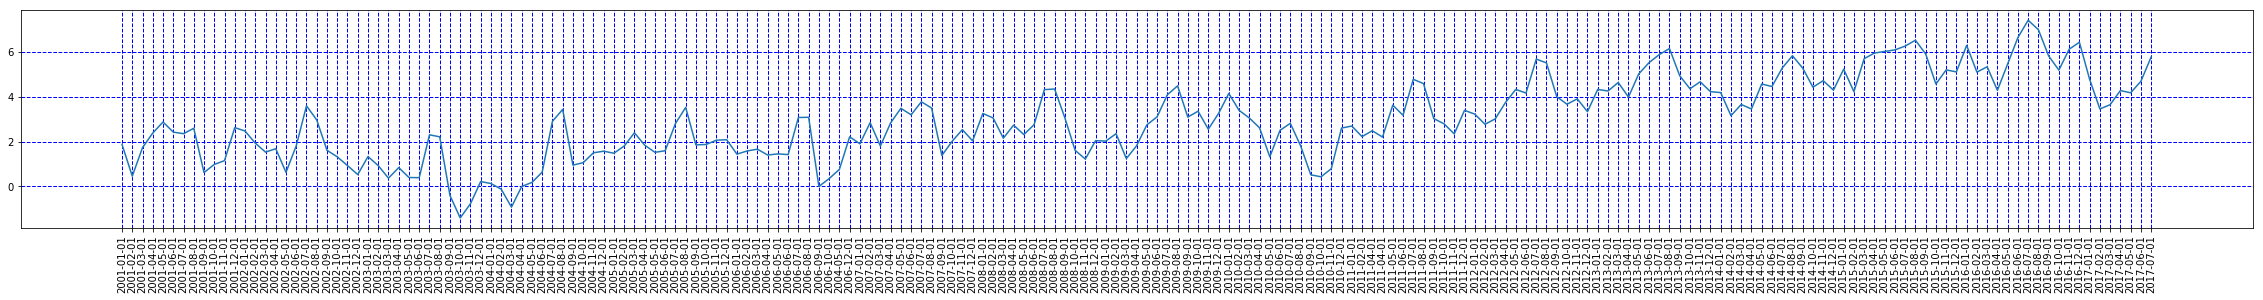

In [34]:
# Plot all ElecNetImports data, Jan 2001 - Jul 2017
plt.figure(figsize = (40,4))
data['ElecNetImports'].plot()
plt.grid(color='b', linestyle='--', linewidth=1)
plt.xticks(range(len(data['ElecNetImports'])),data['Month'].map(lambda x: x.date()),rotation=90)
plt.show()

## Save Prepared Test and Train Data

In [37]:
elecnetimportsonly_test = data_test.set_index('Month')
elecnetimportsonly_test.to_csv('/Users/marieparent/Documents/Berkeley/DX/Group Project/energy-prediction/marie/elecnetimportsonly_test.csv')
elecnetimportsonly_train = data_train.set_index('Month')
elecnetimportsonly_train.to_csv('/Users/marieparent/Documents/Berkeley/DX/Group Project/energy-prediction/marie/elecnetimportsonly_train.csv') 

In [40]:
elecnetimportsonly_train.head()

,ElecNetImports
Month,
2001-01-01,1.87
2001-02-01,0.46
2001-03-01,1.73
2001-04-01,2.38
2001-05-01,2.87


### AR model

In [43]:
from pandas import Series
train = Series.from_csv('/Users/marieparent/Documents/Berkeley/DX/Group Project/energy-prediction/marie/elecnetimportsonly_train.csv', header=0)
test = Series.from_csv('/Users/marieparent/Documents/Berkeley/DX/Group Project/energy-prediction/marie/elecnetimportsonly_test.csv', header=0)


/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [44]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [45]:
# MARIE Negi's 'final' file goes from Jul 2017 to Jan 2001 - all of the data.  
# What is the purpose of this final?  Validation?
# series = Series.from_csv('/Users/marieparent/Downloads/final.csv', header=0)
# series

In [46]:
# split dataset
# X = series.values
train, test = train.values, test.values
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lags: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lags: 14
Coefficients: [ 0.15149343  0.76667734 -0.07621806  0.1428191  -0.03095444  0.03927091
  0.07635893 -0.10440443  0.0290351  -0.08454046 -0.04190862  0.13473832
  0.41859658 -0.22386345 -0.09303224]


In [49]:
# predicted_feature = model.predict(model_fit.params, start='2015-01-01', end='2017-01-01', dynamic=False)
# # predicted_feature

AttributeError: 'NoneType' object has no attribute 'get_loc'

In [57]:
# make predictions
predictions = np.empty()
predictions = model_fit.predict(start='2015-01-01', end='2017-01-01', dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
pyplot.plot(predictions, color='blue')
pyplot.title('from 2015-1 to 2017-8')
pyplot.show()

TypeError: Required argument 'shape' (pos 1) not found

In [51]:
# Error
error

NameError: name 'error' is not defined